In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def line(x, a, b, s):
    """
    :param x: vector of x values, np.arange(-10, 10, 0.1)
    :param a: a parameter of the line
    :param b: b parameter of the line
    :param s: sigma parameret of the noise (with normal distribution)
    """
    y = a*x + b
    y += s * np.random.randn(len(y))
    
    return y

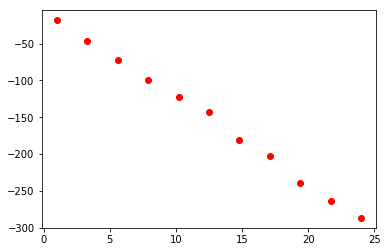

In [4]:
a=-12.
b=-2.
s=5.

XYp={'x':np.array(np.arange(1,25,2.3)),'y':np.array([])}
XYp['y'] = line(XYp['x'], a, b, s)

plt.plot(XYp['x'],XYp['y'],'ro')

In [5]:
def print_line(XYp):
    n = len(XYp['x'])
    
    sumX = sum(XYp['x'])
    sumY = sum(XYp['y'])
    sumXY = 0.
    sumXqrt = 0.
    sum_Xqrt_Y = 0.
    sumXqrt3 = 0.
    sumXqrt4 = 0.
    
    for i in range(len(XYp['y'])):
        sumXY += XYp['x'][i]*XYp['y'][i]
        sumXqrt += XYp['x'][i]**2
    
    a = (n*sumXY - sumX*sumY)/(n*sumXqrt - sumX**2)
    b = (sumY - a*sumX)/n
    XYl1 = {'x':[min(XYp['x'])-3,max(XYp['x'])+3]}
    XYl1['y'] = [a*i+b for i in XYl1['x']]
    XYl2 = {'x':XYp['x'].copy()}
    XYl2['y'] = [(((i+1)**(1./3))+1) for i in XYl2['x']]
    
    otkl1 = 0.
    for i in range(n):
        otkl1 += ((XYp['y'][i]-((a*XYp['x'][i])+b))**2)

    otkl2 = 0.    
    for i in range(n):
        otkl2 += ((XYp['y'][i]-((XYp['x'][i]+1)**(1./3)+1))**2)
    
    plt.plot(XYp['x'],XYp['y'],'ro')
    
    plt.plot(XYl1['x'],XYl1['y'],color='blue')
    plt.plot(XYl2['x'],XYl2['y'],color='Green')    

    plt.text(XYl1['x'][0],XYl1['y'][1],'Pogreshnost 1 = '+str(round(otkl1,4)),color='blue')
    plt.text(XYl1['x'][0],(XYl1['y'][1]-(XYl1['y'][1]-XYl1['y'][0])*0.07),'Pogreshnost 2 = '+str(round(otkl2,4)),color='Green')
    plt.text(XYl1['x'][0],(XYl1['y'][1]-(XYl1['y'][1]-XYl1['y'][0])*0.15),'a = '+str(round(a,4))+'     b = '+str(round(b,4)),color='black')
    plt.text((XYl1['x'][1]-(XYl1['x'][1]-XYl1['x'][0])*0.15),XYl1['y'][1],'line 1',color='blue')
    plt.text((XYl2['x'][-1]+(XYl1['x'][1]-XYl1['x'][0])*0.05),XYl2['y'][-1],'line 2',color='Green')

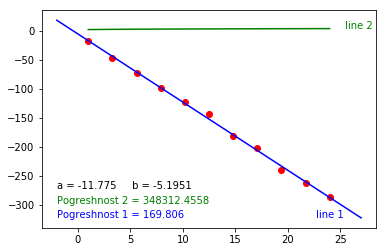

In [6]:
print_line(XYp)